In [428]:
from __future__ import print_function
import time

import numpy as np
import pandas as pd

from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sys
import warnings
import seaborn as sns

In [429]:
train=pd.read_csv('train.csv',sep='|')
test=pd.read_csv('test.csv',sep='|')

In [430]:
train['scannedLineItems'] = train['scannedLineItemsPerSecond'] * train['totalScanTimeInSeconds']
train['pricePerScannedLineItem'] = train['grandTotal'] / train['scannedLineItems']
train['scansWithoutRegistrationPerScannedLineItem'] = train['scansWithoutRegistration'] / train['scannedLineItems']
train['quantityModificationsPerScannedLineItem'] = train['quantityModifications'] / train['scannedLineItems']
train['lineItemVoidsPerSecond'] = train['lineItemVoids'] / train['totalScanTimeInSeconds']
train['scansWithoutRegistrationPerSecond'] = train['scansWithoutRegistration'] / train['totalScanTimeInSeconds']
train['quantityModificationsPerSecond'] = train['quantityModifications'] / train['totalScanTimeInSeconds']
train['secondsPerEuro'] = train['totalScanTimeInSeconds'] / train['grandTotal']
train['lineItemVoidsPerEuro'] = train['lineItemVoids'] / train['grandTotal']
train['scansWithoutRegistrationPerEuro'] = train['scansWithoutRegistration'] / train['grandTotal']
train['quantityModificationsPerEuro'] = train['quantityModifications'] / train['grandTotal']

In [431]:
test['scannedLineItems'] = test['scannedLineItemsPerSecond'] * test['totalScanTimeInSeconds']
test['pricePerScannedLineItem'] = test['grandTotal'] / test['scannedLineItems']
test['scansWithoutRegistrationPerScannedLineItem'] = test['scansWithoutRegistration'] / test['scannedLineItems']
test['quantityModificationsPerScannedLineItem'] = test['quantityModifications'] / test['scannedLineItems']
test['lineItemVoidsPerSecond'] = test['lineItemVoids'] / test['totalScanTimeInSeconds']
test['scansWithoutRegistrationPerSecond'] = test['scansWithoutRegistration'] / test['totalScanTimeInSeconds']
test['quantityModificationsPerSecond'] = test['quantityModifications'] / test['totalScanTimeInSeconds']
test['secondsPerEuro'] = test['totalScanTimeInSeconds'] / test['grandTotal']
test['lineItemVoidsPerEuro'] = test['lineItemVoids'] / test['grandTotal']
test['scansWithoutRegistrationPerEuro'] = test['scansWithoutRegistration'] / test['grandTotal']
test['quantityModificationsPerEuro'] = test['quantityModifications'] / test['grandTotal']

In [432]:
test.loc[test['grandTotal'] == 0.00, 'secondsPerEuro'] = test['totalScanTimeInSeconds'] / 0.01
test.loc[test['grandTotal'] == 0.00, 'lineItemVoidsPerEuro'] = test['lineItemVoids'] / 0.01
test.loc[test['grandTotal'] == 0.00, 'scansWithoutRegistrationPerEuro'] = test['scansWithoutRegistration'] / 0.01
test.loc[test['grandTotal'] == 0.00, 'quantityModificationsPerEuro'] = test['quantityModifications'] / 0.01

In [433]:
test['fraud'] = -1

In [434]:
# train = pd.concat([train, test], ignore_index=True)

train = pd.concat([train, test.sample(5000, random_state = 42)], ignore_index=True)

In [435]:
# Split *train* dataset to feature and target sets 
X = train.drop('fraud',axis=1)
Y = train['fraud']

if not sys.warnoptions:
    warnings.simplefilter("ignore")

print(X.shape, Y.shape)

(6879, 20) (6879,)


In [436]:
# For reproducability of the results
np.random.seed(42)

In [437]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer 

feature_scaler = MinMaxScaler()
X = pd.DataFrame(feature_scaler.fit_transform(X.values), columns=X.columns, index=X.index)

#feature_scaler = StandardScaler()
#X = pd.DataFrame(feature_scaler.fit_transform(X.values), columns=X.columns, index=X.index)
#data_preparation = "StandardScaler"

#transformer = FunctionTransformer(np.log1p, validate=True)
#X_scaled = pd.DataFrame(transformer.transform(X), columns=X.columns, index=X.index)
#data_preparation = "LogScaler"

In [438]:
Extended_Data = X.copy()

In [439]:
pca = PCA(n_components=7)
pca_result = pca.fit_transform(Extended_Data)

Extended_Data['pca-one'] = pca_result[:,0]
Extended_Data['pca-two'] = pca_result[:,1] 
Extended_Data['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
print('Cumulative explained variation for 7 principal components: {}'.format(np.sum(pca.explained_variance_ratio_)))

Explained variation per principal component: [0.16124352 0.15673254 0.14712506 0.13477654 0.13073972 0.11265633
 0.11016669]
Cumulative explained variation for 7 principal components: 0.9534403996400646


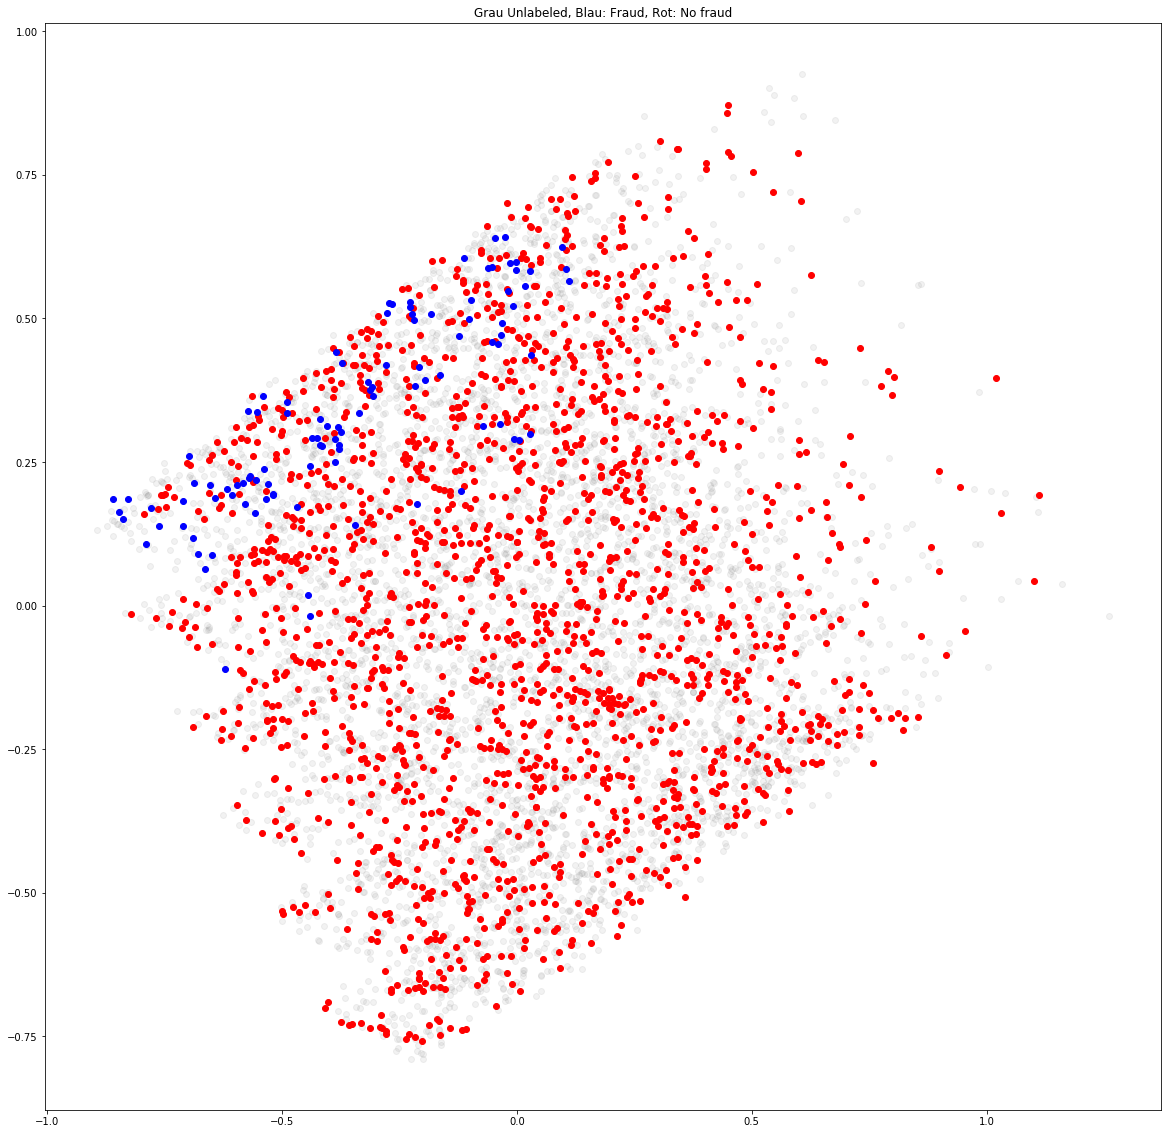

In [440]:
plt.rcParams['figure.figsize'] = (20,20)

plt.title('Grau Unlabeled, Blau: Fraud, Rot: No fraud')

plt.scatter(Extended_Data["pca-one"][Y == -1].values, Extended_Data["pca-two"][Y == -1].values, color='grey', alpha = 0.1)
plt.scatter(Extended_Data["pca-one"][Y == 0], Extended_Data["pca-two"][Y == 0], color='r')
plt.scatter(Extended_Data["pca-one"][Y == 1], Extended_Data["pca-two"][Y == 1], color='b')
plt.show()

In [449]:
time_start = time.time()

X_filtered = X.copy()

tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=300, init = 'pca')
tsne_results = tsne.fit_transform(X_filtered)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

X_filtered['tsne-2d-one'] = tsne_results[:,0]
X_filtered['tsne-2d-two'] = tsne_results[:,1]

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 6879 samples in 0.005s...
[t-SNE] Computed neighbors for 6879 samples in 0.909s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6879
[t-SNE] Computed conditional probabilities for sample 2000 / 6879
[t-SNE] Computed conditional probabilities for sample 3000 / 6879
[t-SNE] Computed conditional probabilities for sample 4000 / 6879
[t-SNE] Computed conditional probabilities for sample 5000 / 6879
[t-SNE] Computed conditional probabilities for sample 6000 / 6879
[t-SNE] Computed conditional probabilities for sample 6879 / 6879
[t-SNE] Mean sigma: 0.213699
[t-SNE] KL divergence after 250 iterations with early exaggeration: 93.017502
[t-SNE] KL divergence after 300 iterations: 3.344220
t-SNE done! Time elapsed: 14.928661346435547 seconds


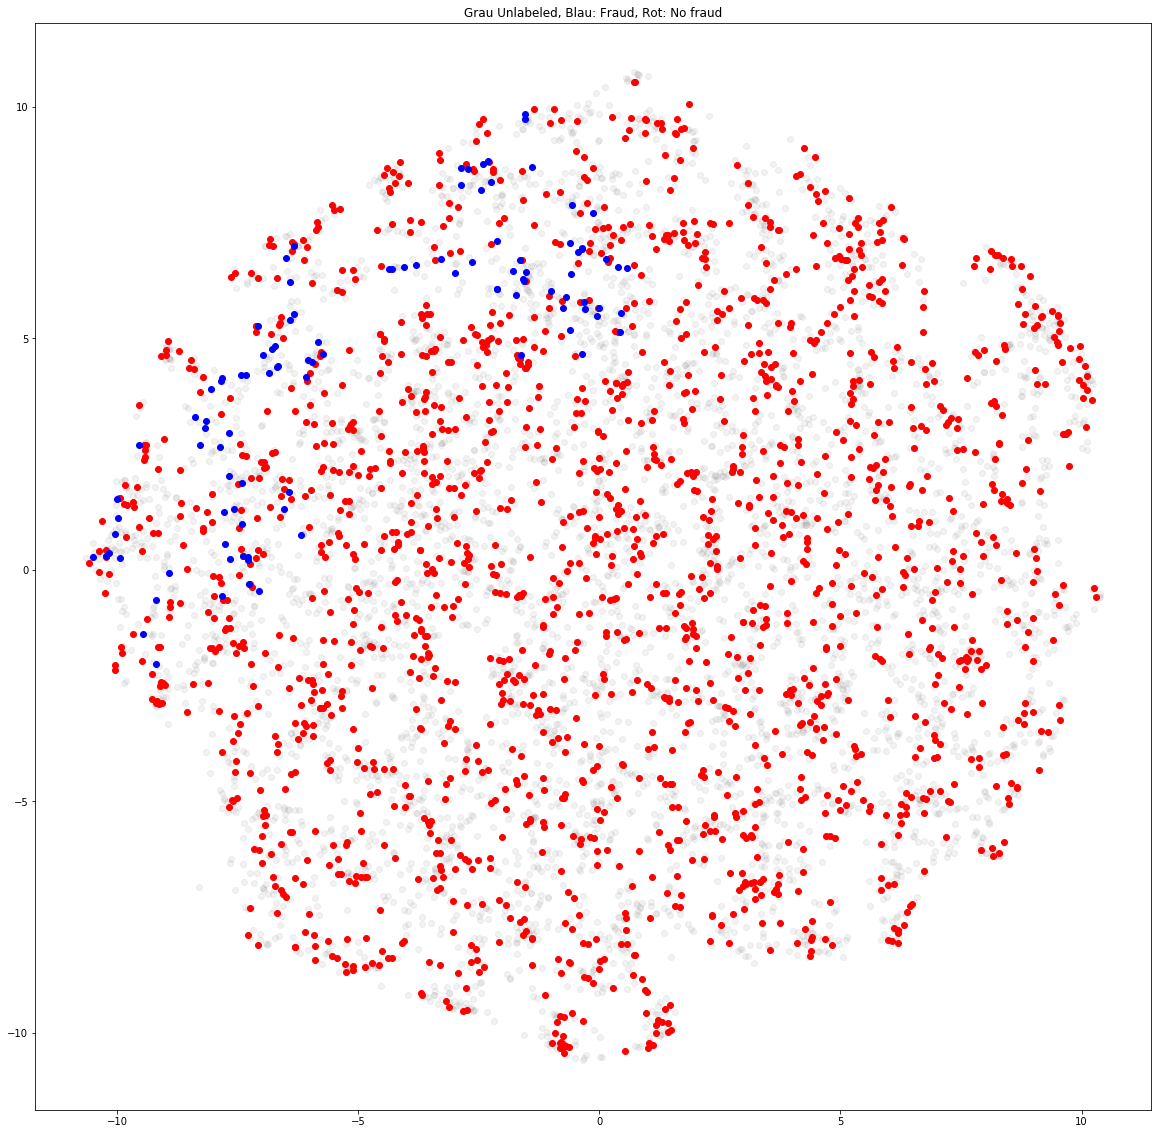

In [450]:
plt.rcParams['figure.figsize'] = (20,20)

plt.title('Grau Unlabeled, Blau: Fraud, Rot: No fraud')

plt.scatter(X_filtered["tsne-2d-one"][Y == -1].values, X_filtered["tsne-2d-two"][Y == -1].values, color='grey', alpha = 0.1)
plt.scatter(X_filtered["tsne-2d-one"][Y == 0], X_filtered["tsne-2d-two"][Y == 0], color='r')
plt.scatter(X_filtered["tsne-2d-one"][Y == 1], X_filtered["tsne-2d-two"][Y == 1], color='b')
plt.show()

In [402]:
time_start = time.time()

X_filtered = X[X['trustLevel'] == 0.0]

tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=300, random_state = 42)
tsne_results = tsne.fit_transform(X_filtered)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

X_filtered['tsne-2d-one'] = tsne_results[:,0]
X_filtered['tsne-2d-two'] = tsne_results[:,1]

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1142 samples in 0.001s...
[t-SNE] Computed neighbors for 1142 samples in 0.047s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1142
[t-SNE] Computed conditional probabilities for sample 1142 / 1142
[t-SNE] Mean sigma: 0.256038
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.493546
[t-SNE] KL divergence after 300 iterations: 1.802625
t-SNE done! Time elapsed: 1.9874823093414307 seconds


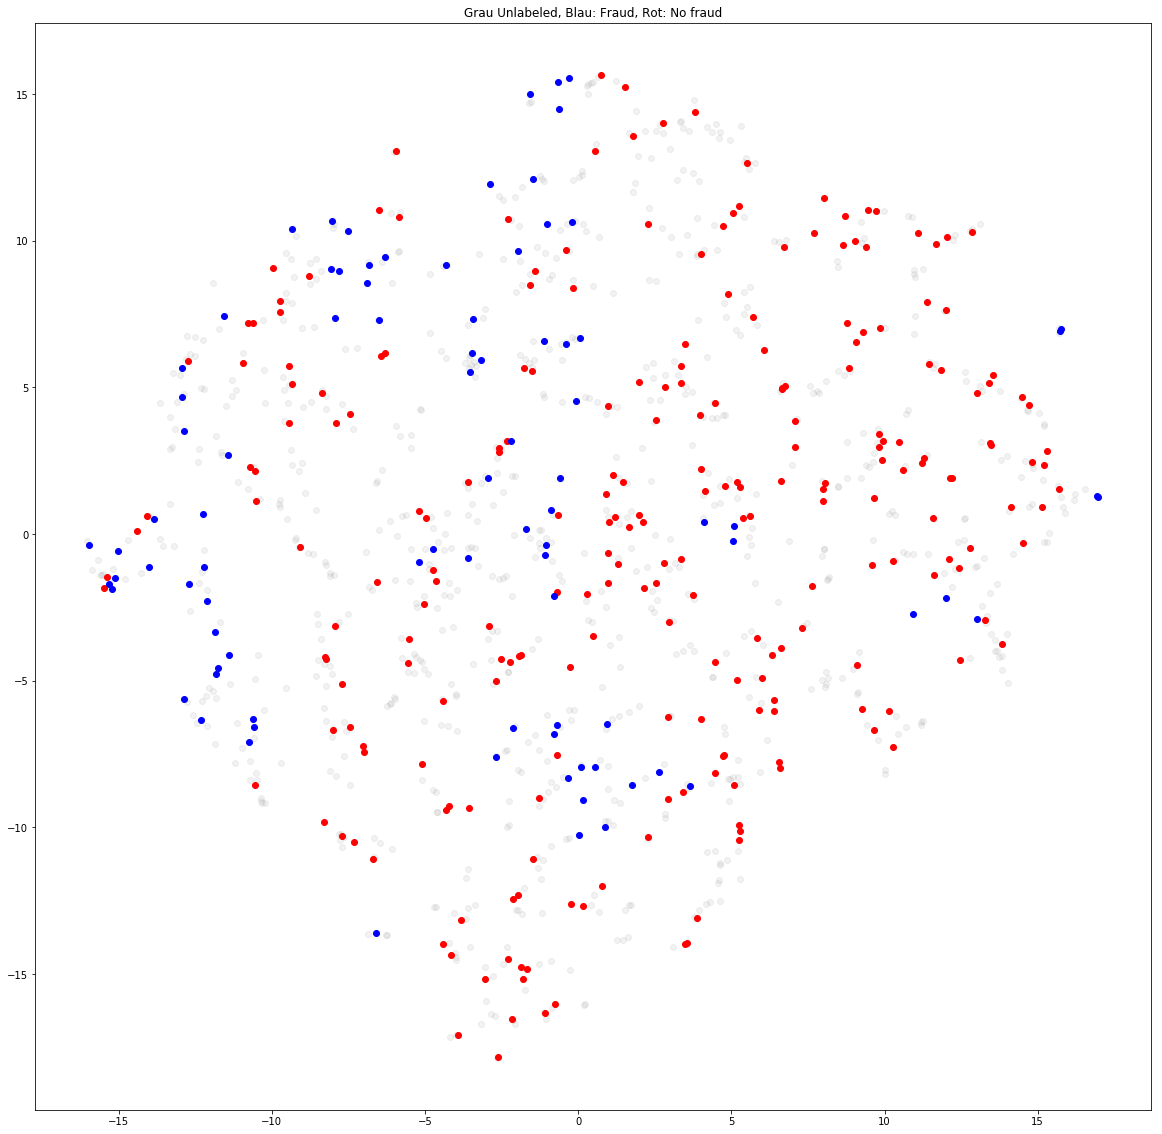

In [403]:
plt.rcParams['figure.figsize'] = (20,20)

plt.title('Grau Unlabeled, Blau: Fraud, Rot: No fraud')

plt.scatter(X_filtered["tsne-2d-one"][Y == -1].values, X_filtered["tsne-2d-two"][Y[X['trustLevel'] == 0.0] == -1].values, color='grey', alpha = 0.1)
plt.scatter(X_filtered["tsne-2d-one"][Y == 0], X_filtered["tsne-2d-two"][Y[X['trustLevel'] == 0.0 ] == 0], color='r')
plt.scatter(X_filtered["tsne-2d-one"][Y == 1], X_filtered["tsne-2d-two"][Y[X['trustLevel'] == 0.0 ] == 1], color='b')
plt.show()

In [406]:
time_start = time.time()

X_filtered = X[X['trustLevel'] == 0.2]

tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=300, random_state = 42)
tsne_results = tsne.fit_transform(X_filtered)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

X_filtered['tsne-2d-one'] = tsne_results[:,0]
X_filtered['tsne-2d-two'] = tsne_results[:,1]

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1147 samples in 0.001s...
[t-SNE] Computed neighbors for 1147 samples in 0.021s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1147
[t-SNE] Computed conditional probabilities for sample 1147 / 1147
[t-SNE] Mean sigma: 0.755281
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.124146
[t-SNE] KL divergence after 300 iterations: 0.503486
t-SNE done! Time elapsed: 1.374582052230835 seconds


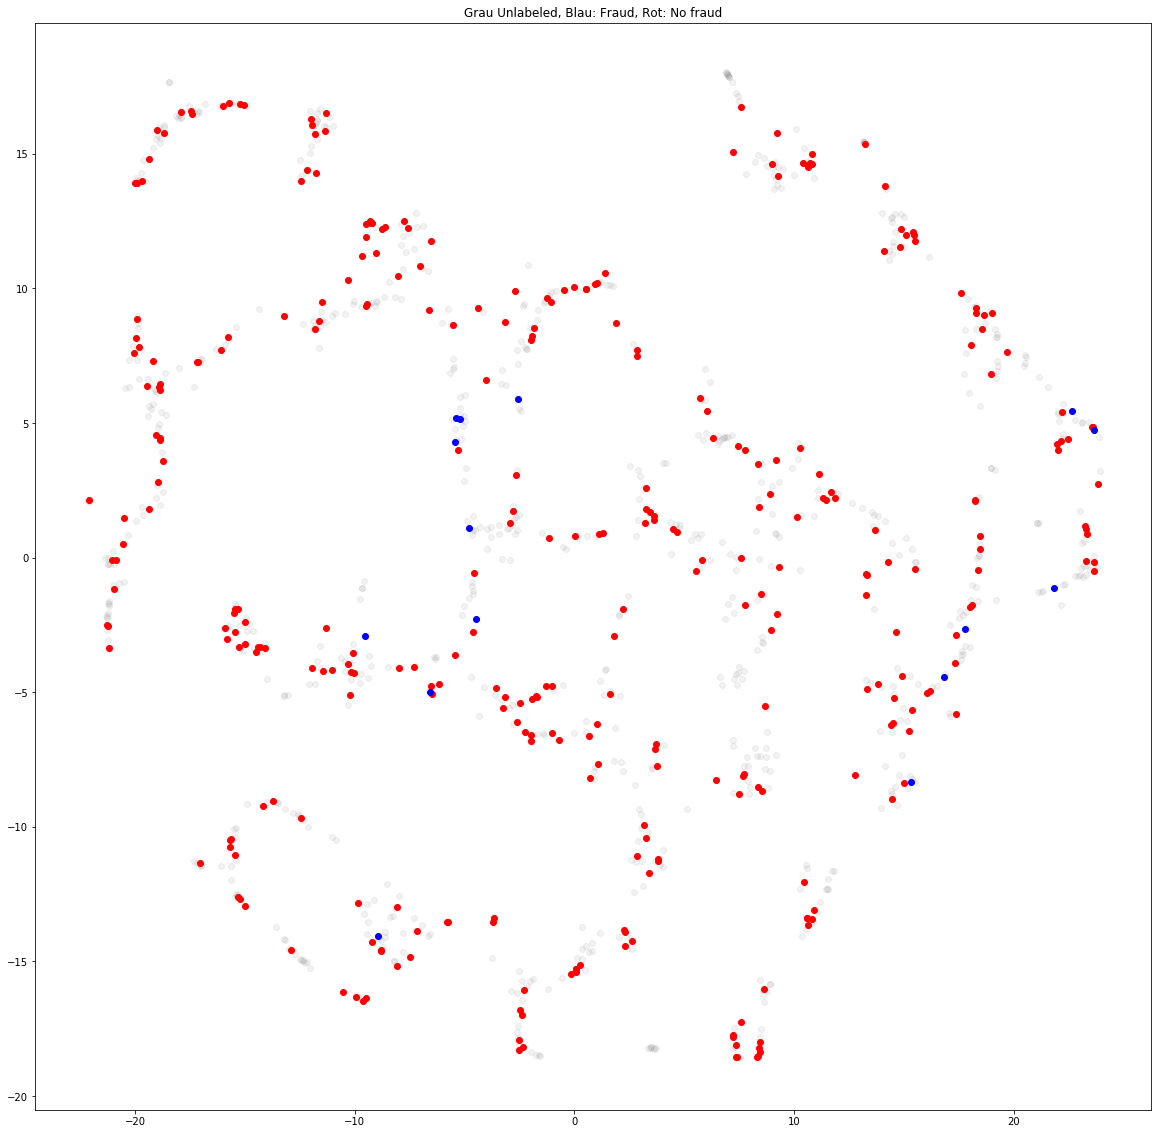

In [407]:
plt.rcParams['figure.figsize'] = (20,20)

plt.title('Grau Unlabeled, Blau: Fraud, Rot: No fraud')

plt.scatter(X_filtered["tsne-2d-one"][Y == -1].values, X_filtered["tsne-2d-two"][Y[X['trustLevel'] == 0.2] == -1].values, color='grey', alpha = 0.1)
plt.scatter(X_filtered["tsne-2d-one"][Y == 0], X_filtered["tsne-2d-two"][Y[X['trustLevel'] == 0.2 ] == 0], color='r')
plt.scatter(X_filtered["tsne-2d-one"][Y == 1], X_filtered["tsne-2d-two"][Y[X['trustLevel'] == 0.2 ] == 1], color='b')
plt.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 51879 samples in 0.063s...
[t-SNE] Computed neighbors for 51879 samples in 16.055s...
[t-SNE] Computed conditional probabilities for sample 1000 / 51879
[t-SNE] Computed conditional probabilities for sample 2000 / 51879
[t-SNE] Computed conditional probabilities for sample 3000 / 51879
[t-SNE] Computed conditional probabilities for sample 4000 / 51879
[t-SNE] Computed conditional probabilities for sample 5000 / 51879
[t-SNE] Computed conditional probabilities for sample 6000 / 51879
[t-SNE] Computed conditional probabilities for sample 7000 / 51879
[t-SNE] Computed conditional probabilities for sample 8000 / 51879
[t-SNE] Computed conditional probabilities for sample 9000 / 51879
[t-SNE] Computed conditional probabilities for sample 10000 / 51879
[t-SNE] Computed conditional probabilities for sample 11000 / 51879
[t-SNE] Computed conditional probabilities for sample 12000 / 51879
[t-SNE] Computed conditional probabilities for sa

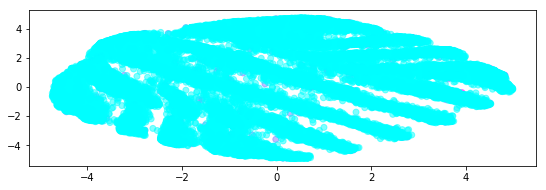

In [183]:
count=1
#for perp in range(0,110,10):

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(X)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

Extended_Data['tsne-2d-one'] = tsne_results[:,0]
Extended_Data['tsne-2d-two'] = tsne_results[:,1]

ax2 = plt.subplot(6, 2, count)
plt.scatter(Extended_Data["tsne-2d-one"], Extended_Data["tsne-2d-two"],  c=Y, cmap="cool", alpha=0.5)
count+=1

plt.show()

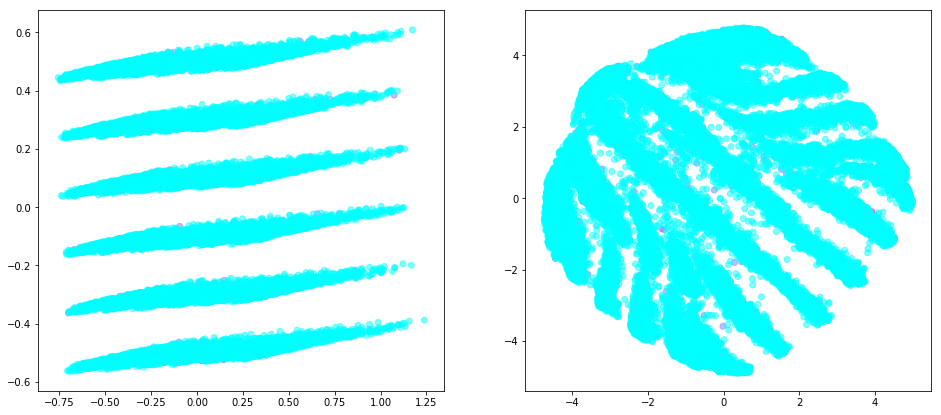

In [184]:
plt.figure(figsize=(16,7))

ax1 = plt.subplot(1, 2, 1)
plt.scatter(Extended_Data["pca-one"], Extended_Data["pca-two"],  c=Y, cmap="cool", alpha=0.5)

ax2 = plt.subplot(1, 2, 2)
plt.scatter(Extended_Data["tsne-2d-one"], Extended_Data["tsne-2d-two"],  c=Y, cmap="cool", alpha=0.5)

plt.show()

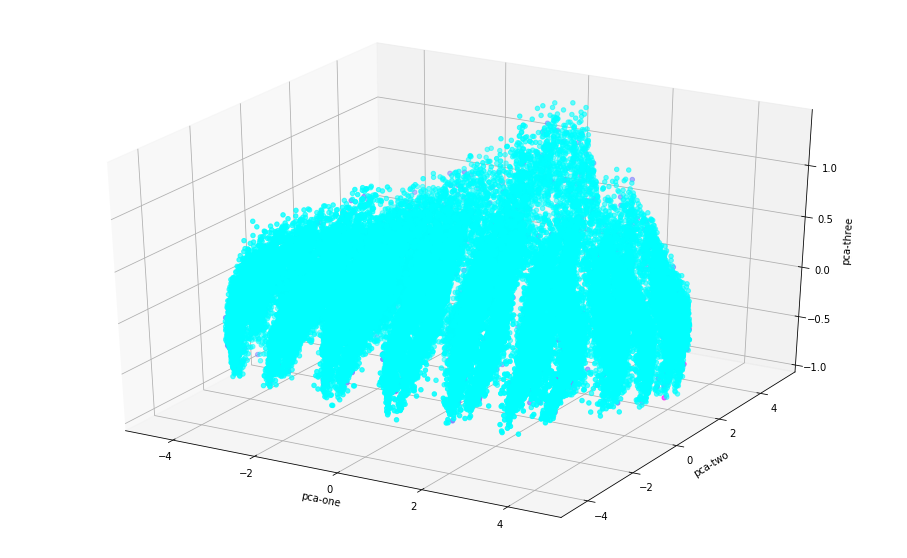

In [187]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=Extended_Data["pca-one"], 
    ys=Extended_Data["pca-two"], 
    zs=Extended_Data["pca-three"], 
    c=Y, 
    cmap='cool'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

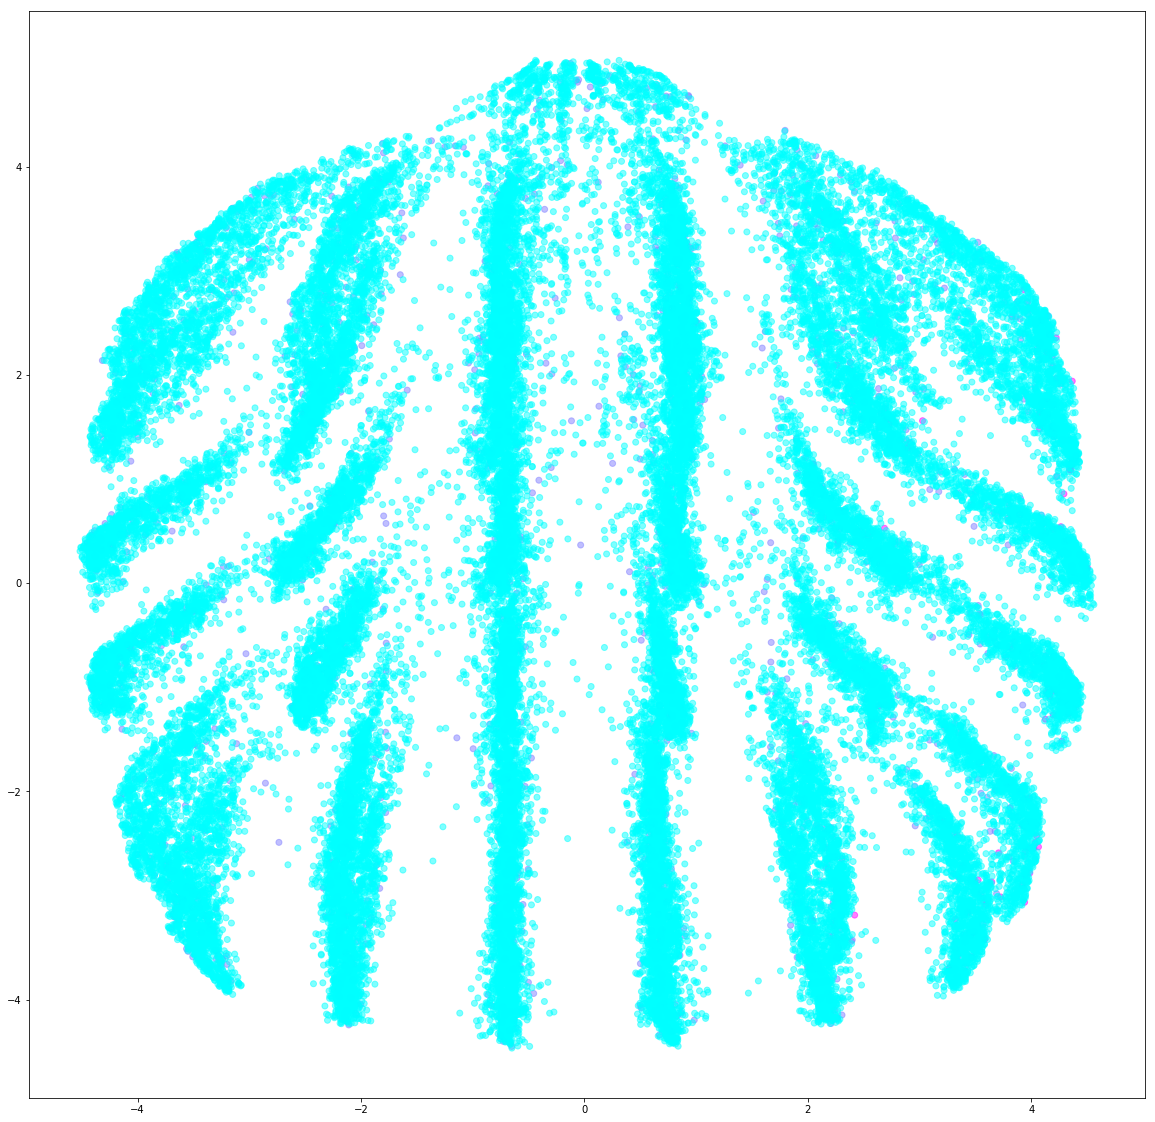

In [189]:
x = Extended_Data["pca-one"]
y = Extended_Data["pca-two"]

plt.scatter(x, y,  c=Y, cmap="cool", alpha=0.5)
plt.show()

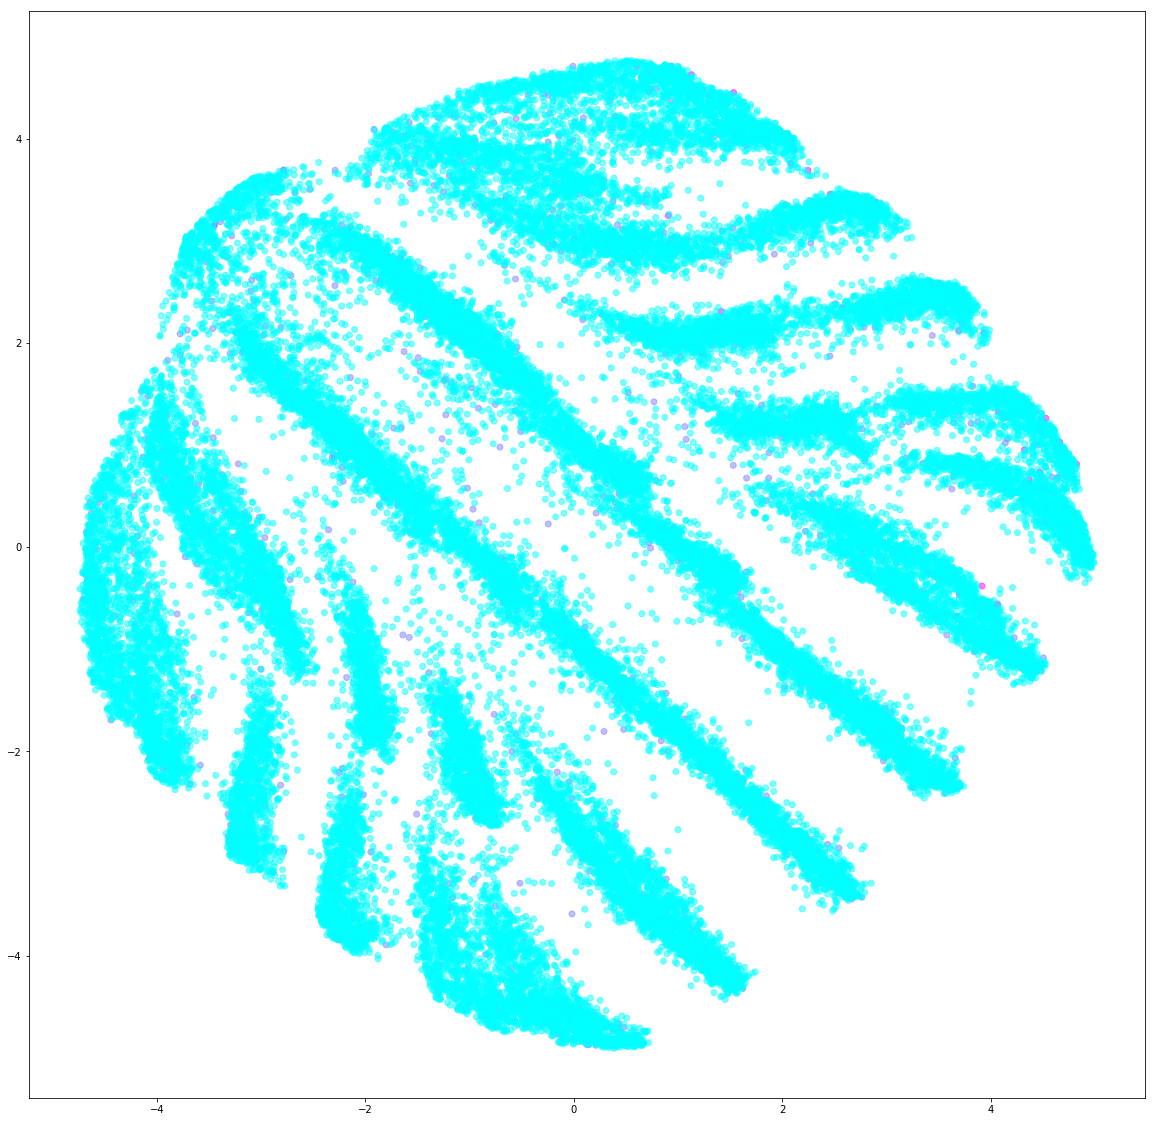

In [190]:
x = Extended_Data["tsne-2d-one"]
y = Extended_Data["tsne-2d-two"]

plt.scatter(x, y,  c=Y, cmap="cool", alpha=0.5)
plt.show()